                     Problem Statement:
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression


In [106]:
# Importing required liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [107]:
#  Importing dataset
ac = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\avocado.csv")

In [108]:
# Printing top rows of  the dataset
ac.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [109]:
ac.shape

(18249, 14)

In [110]:
# Checking datatypes
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Dropping first unknown column as it is an irrelveant column containing the index or serial number

In [111]:
ac.drop('Unnamed: 0', axis=1, inplace = True)

In [112]:
ac.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [113]:
ac.shape

(18249, 13)

In [114]:
# Checking for null values

ac.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [115]:
# Checking for duplicate values
ac.duplicated().sum()

0

In [116]:
# Checking Stats

ac.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [117]:
# Checking correlation

ac.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


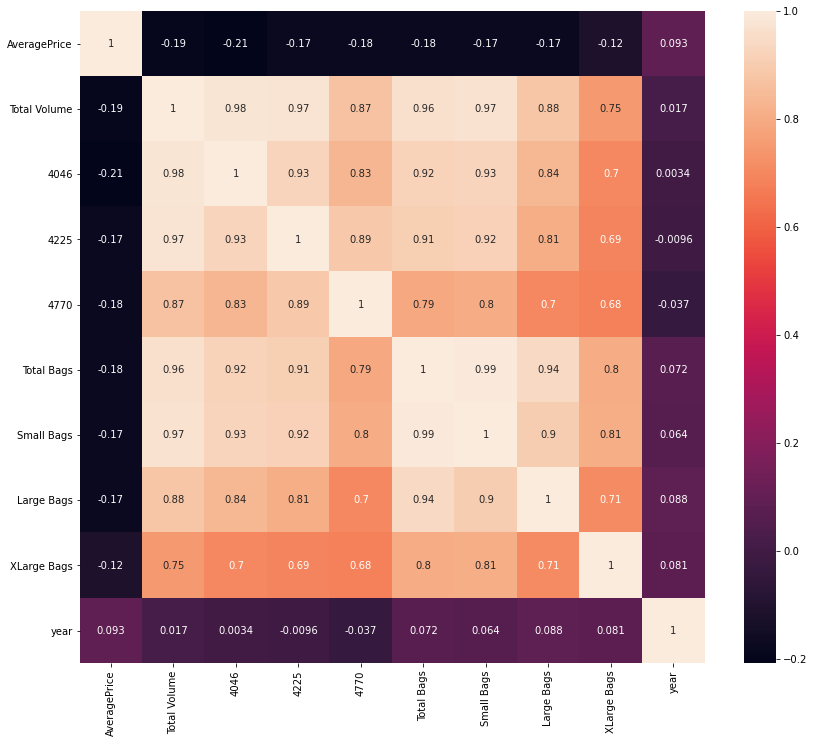

In [118]:
#heatmap
plt.figure(figsize= (14,12))
sns.heatmap(ac.corr(),annot =True )
plt.show()

1.high correlation exists between Total bags extra large bags this columns
2.Also Total volume represents the cumulative sell in units of all sizes of Avacados this 4 columns also shows high correlation.

In [119]:
ac.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

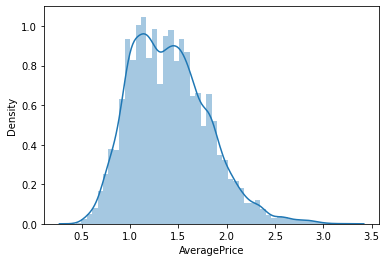

In [120]:
sns.distplot(ac['AveragePrice'])
plt.show()

Average price ranges from 0.5 to 2.5 and has mean 1.40

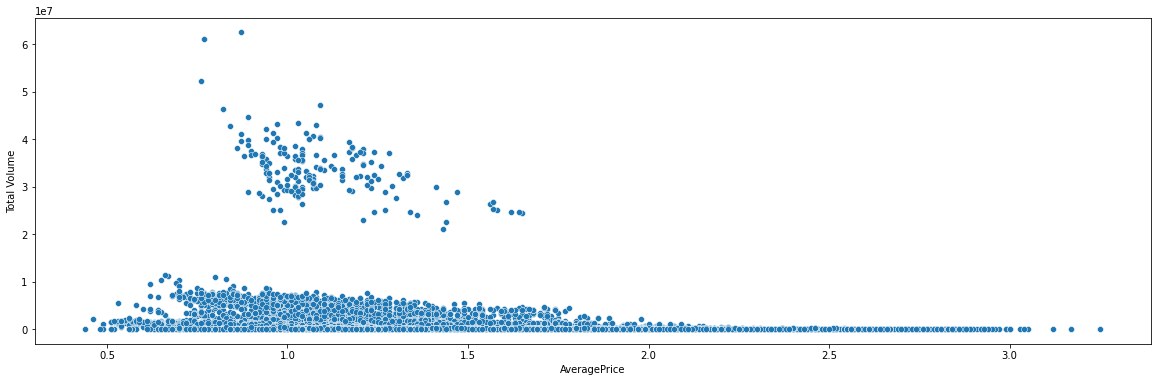

In [121]:
plt.figure(figsize = (20,6))
sns.scatterplot(y = 'Total Volume', x = 'AveragePrice', data  = ac)
plt.show()

1.more volume was sold for price range 0.5 to 1.8 .
2.Total volume is denced between 0 to 1 and 3 to 4

In [122]:
# Splitting date column between days and month
ac['Date']=pd.to_datetime(ac['Date'])
ac['Month']=ac['Date'].apply(lambda x:x.month)
ac['Day']=ac['Date'].apply(lambda x:x.day)

In [123]:
ac.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


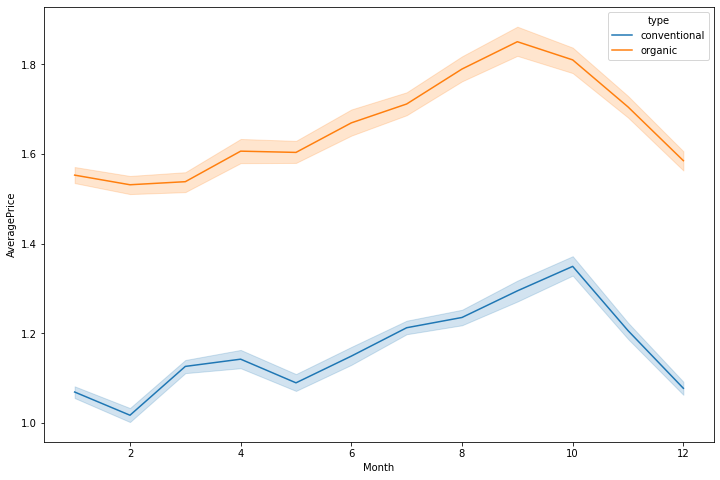

In [124]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=ac)
plt.show()

1.Average price for both type of Avacados increases from 6 to 12 months
2.Also average price for Organic Avacados is greater than Conventional Avacados

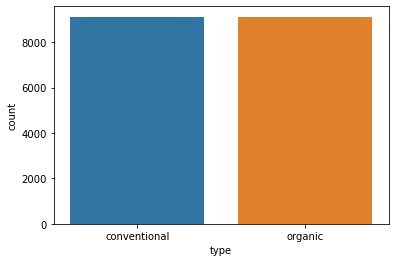

In [125]:
sns.countplot(ac['type'])
plt.show()

In [126]:
ac['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Type column is well balanced between Conventional and Organic Avacados

In [127]:
ac['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [128]:
ac['region'].value_counts()

GrandRapids            338
Seattle                338
SouthCentral           338
Northeast              338
Roanoke                338
Plains                 338
Orlando                338
DallasFtWorth          338
Jacksonville           338
Chicago                338
Charlotte              338
NorthernNewEngland     338
Louisville             338
BaltimoreWashington    338
Houston                338
GreatLakes             338
BuffaloRochester       338
HarrisburgScranton     338
MiamiFtLauderdale      338
Pittsburgh             338
Philadelphia           338
Boise                  338
PhoenixTucson          338
Tampa                  338
Albany                 338
Nashville              338
TotalUS                338
Detroit                338
Boston                 338
LosAngeles             338
Denver                 338
NewYork                338
StLouis                338
Sacramento             338
HartfordSpringfield    338
Indianapolis           338
West                   338
S

There are equal number of counts from each region

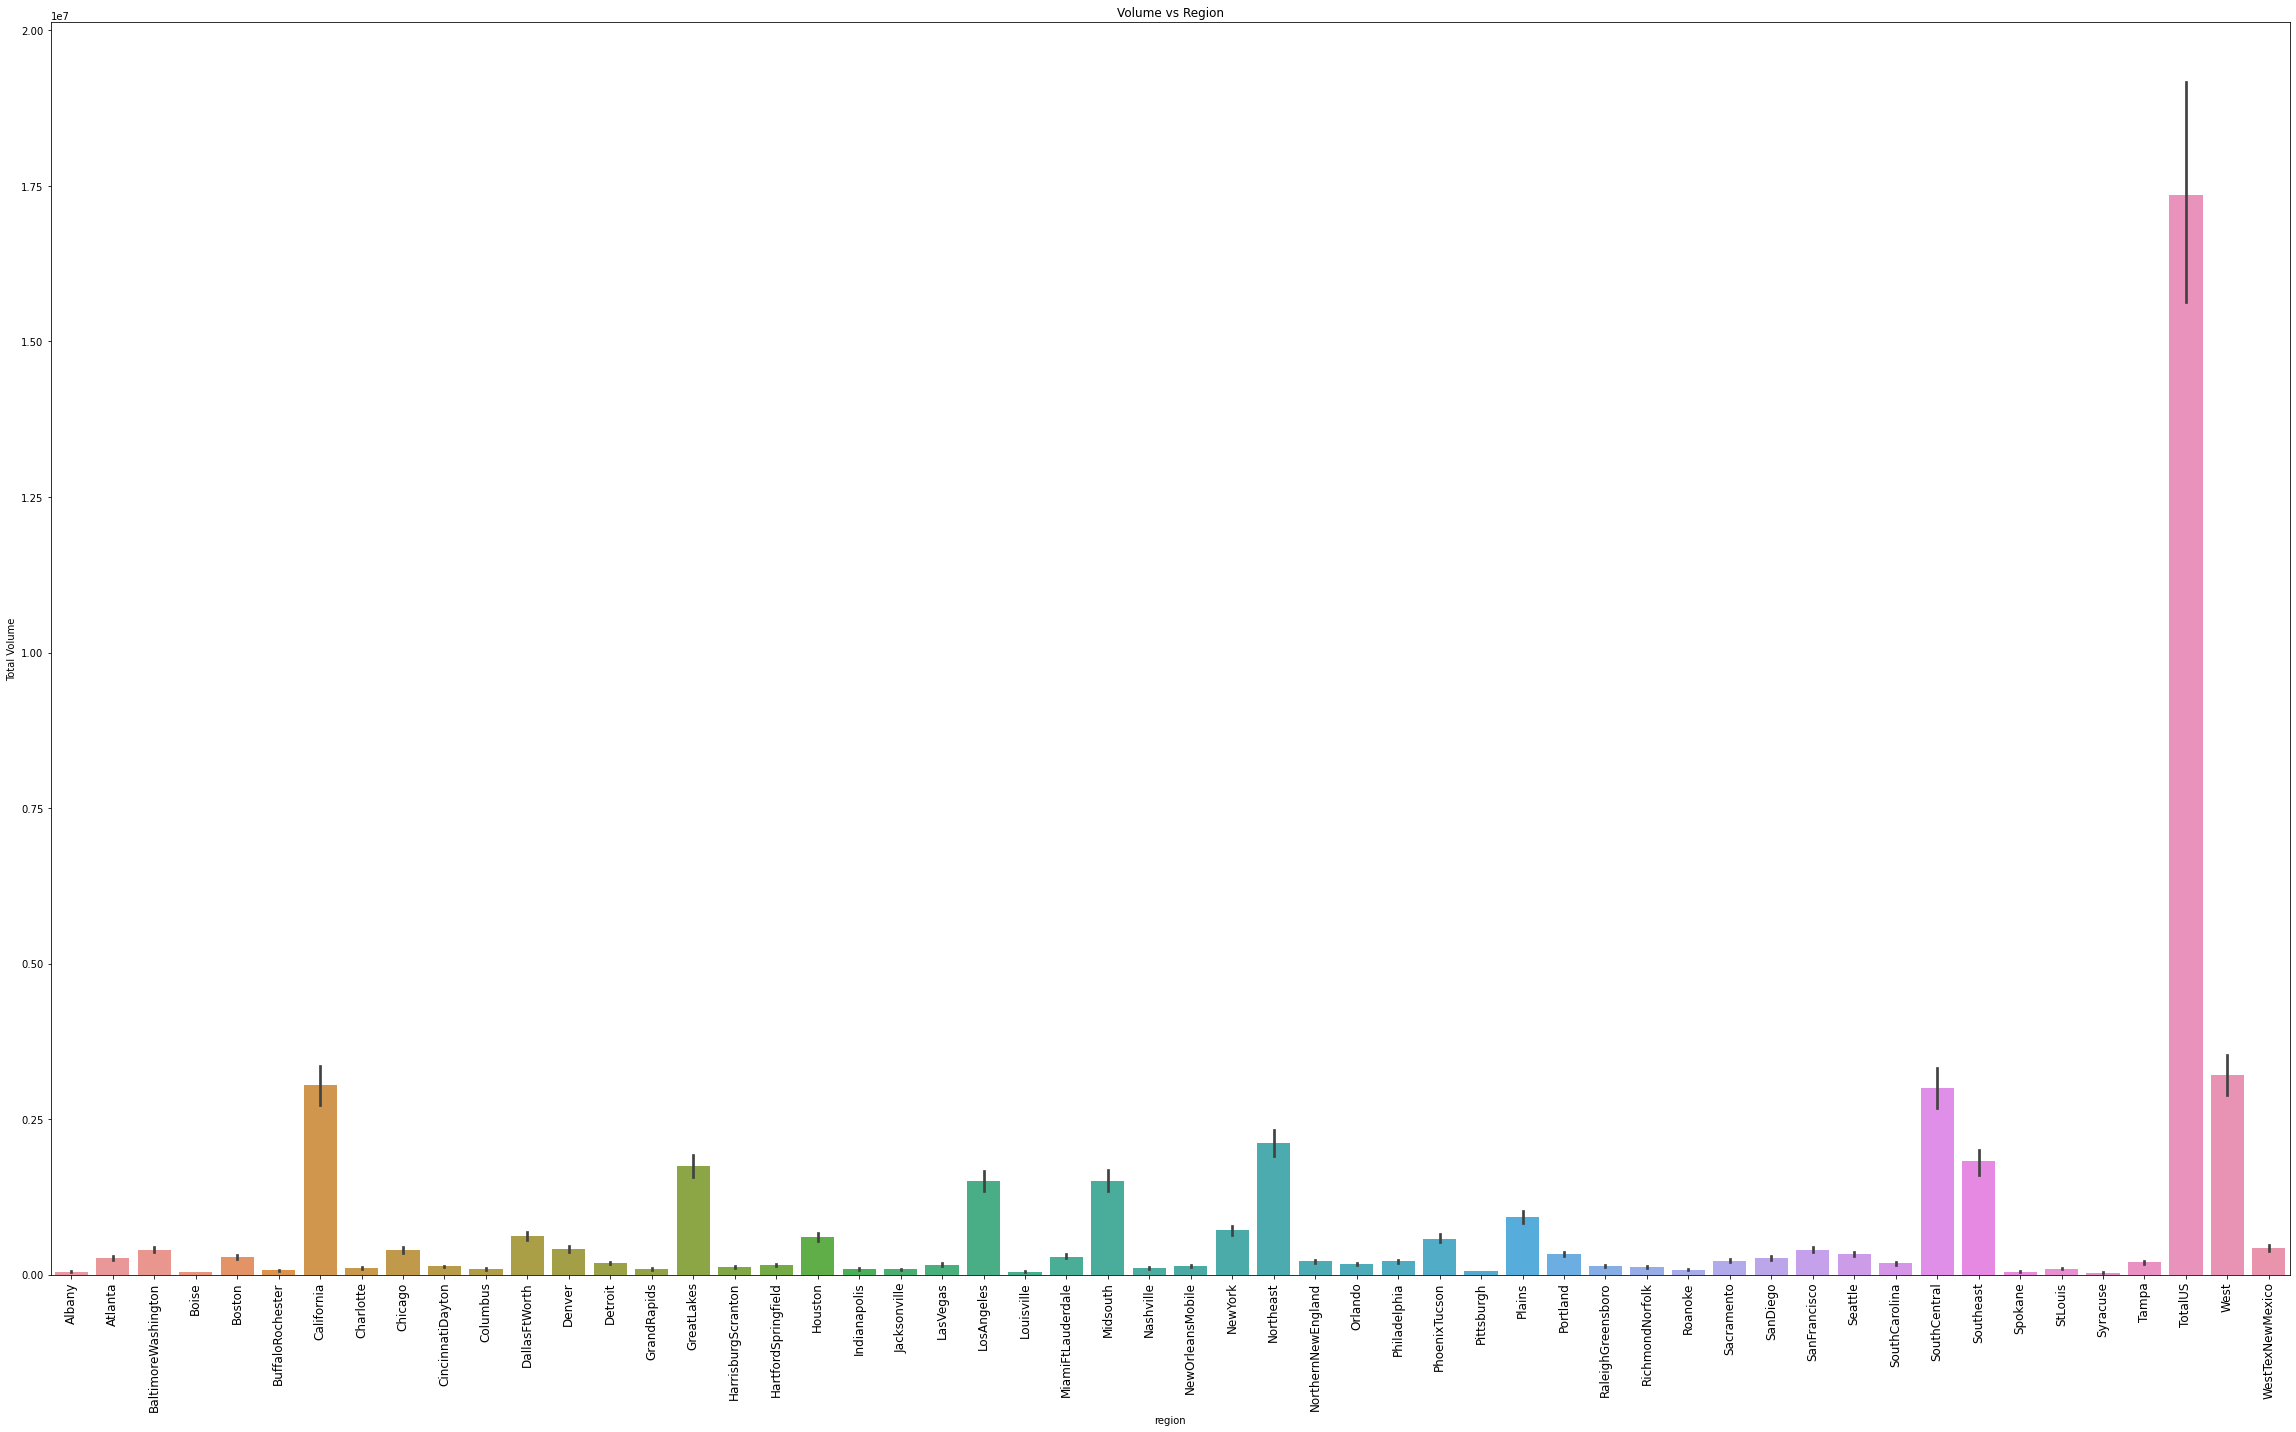

In [129]:
plt.figure(figsize = (32,20),)
sns.barplot(x = 'region', y = 'Total Volume', data = ac)
plt.xticks(rotation = 90, size = 12)
plt.title('Volume vs Region')
plt.tight_layout()

sales volume is high in regions like California, GreatLakes, LA, Midsouth , Northeast,SouthCentral, Southeast and West

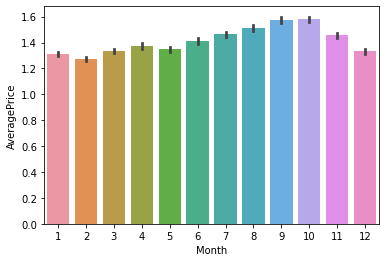

In [130]:
sns.barplot(x = 'Month', y ='AveragePrice',data= ac)
plt.show()

average price increases from 6 to 10 months and then decreases

<AxesSubplot:xlabel='Month', ylabel='Total Volume'>

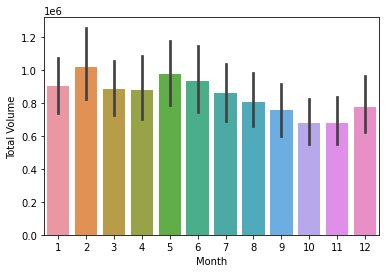

In [131]:
sns.barplot(x = 'Month', y ='Total Volume',data= ac)

sales volume decreses continously from 5-11 months

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

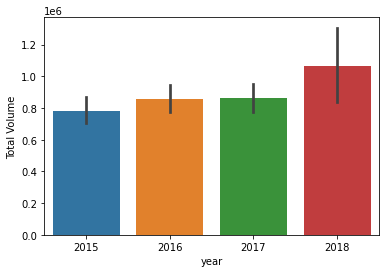

In [132]:
sns.barplot(x = 'year', y ='Total Volume', data = ac)

sales volume increases from 2015-2017 and increases drastically in 2018

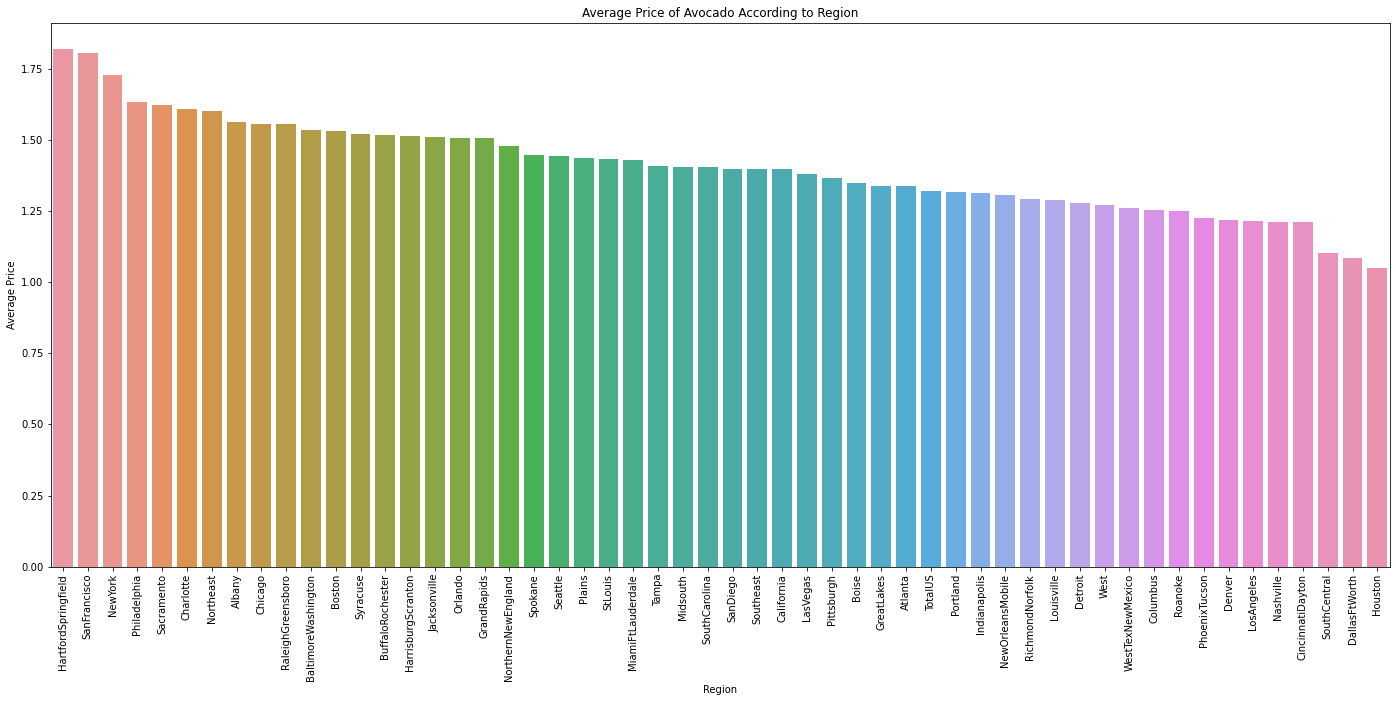

In [133]:
region_list=list(ac.region.unique())
average_price=[]

for i in region_list:
    x=ac[ac.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

ac1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=ac1.average_price.sort_values(ascending=False).index.values
sorted_data=ac1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')
plt.show()

1.Average price is higher in hartford Springfield , sanfransico, NewYork, Philadelpia and few
2.It's lower in regions SouthCentral, dallasFtworth, Houston

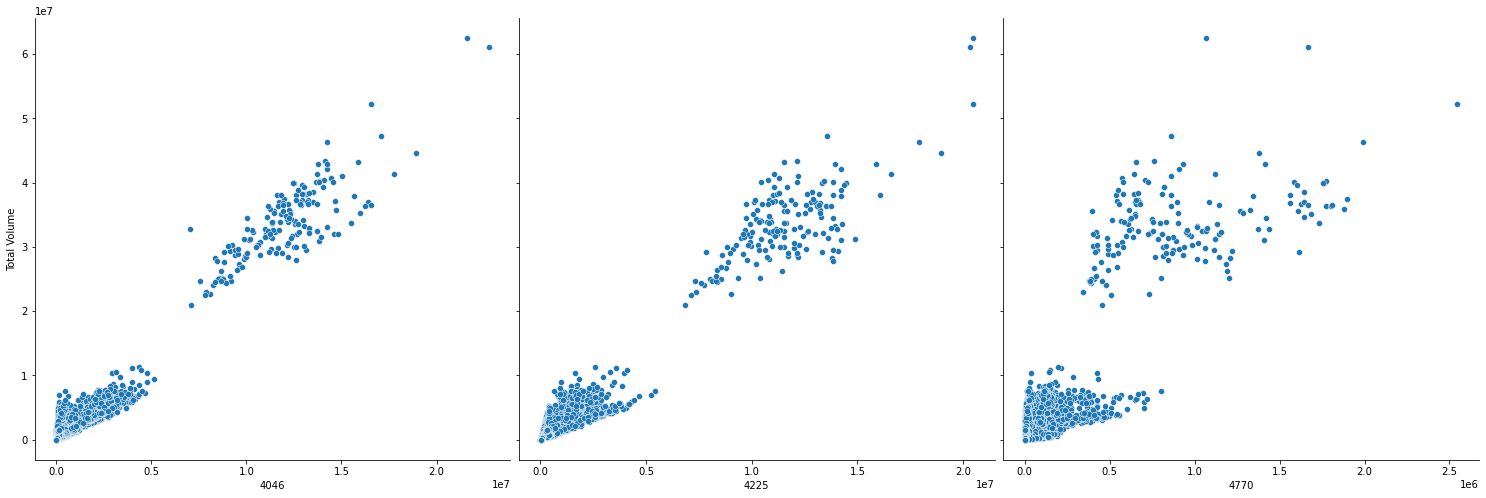

In [134]:
sns.pairplot(ac, x_vars=['4046', '4225', '4770'], y_vars='Total Volume',height = 7, kind = 'scatter')

size is highly denced between 0 to 0.5

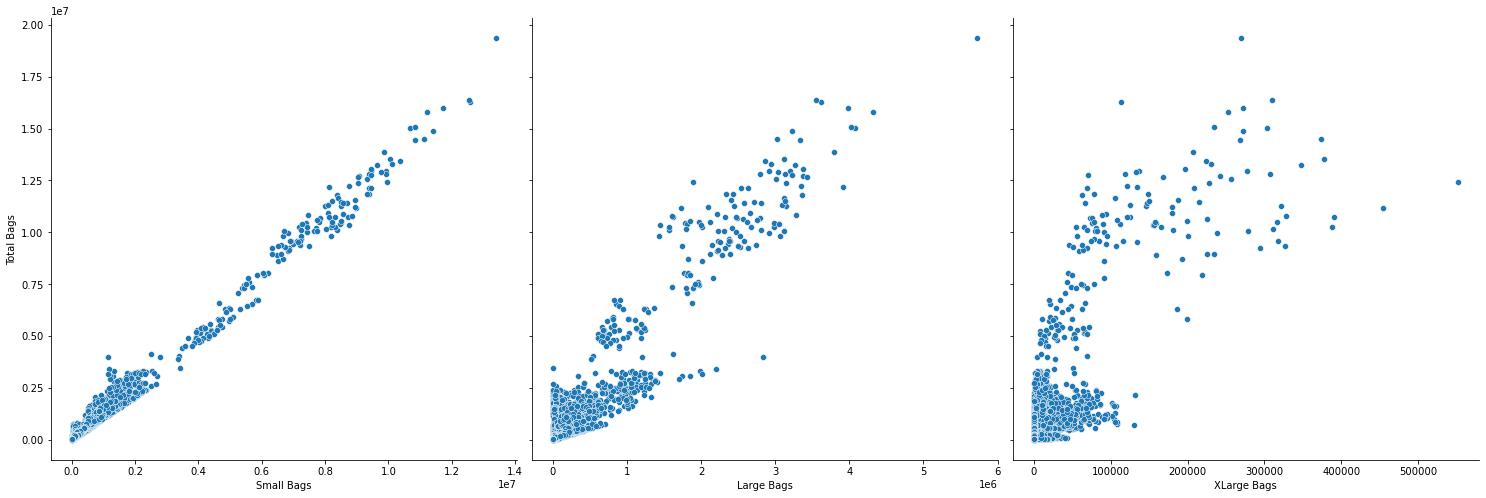

In [135]:
sns.pairplot(ac, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars = 'Total Bags',height = 7, kind = 'scatter')

strong linear regression between small bags and Total bags and also shows that small, large and xlarge bags are highly correlated with the Total bags column

In [136]:
ac.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Already date column splitted into day and month and have year column in our dataset so Date column can be dropped

In [137]:
ac.drop('Date', axis=1, inplace = True)

In [138]:
ac.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [139]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


type and region columns should be converted into integer , Using Label encoder to encode the columns

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [141]:
ac['type']=le.fit_transform(ac['type'])

ac['region']=le.fit_transform(ac['region'])


In [142]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [143]:
# Checking for Skewness
ac.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [144]:
from sklearn.preprocessing import power_transform
ac_new = power_transform(ac)

In [145]:
ac=pd.DataFrame(ac_new, columns=ac.columns)

In [146]:
ac.skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
Month          -0.146584
Day            -0.208462
dtype: float64

skewness removed from our dataset

C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\an

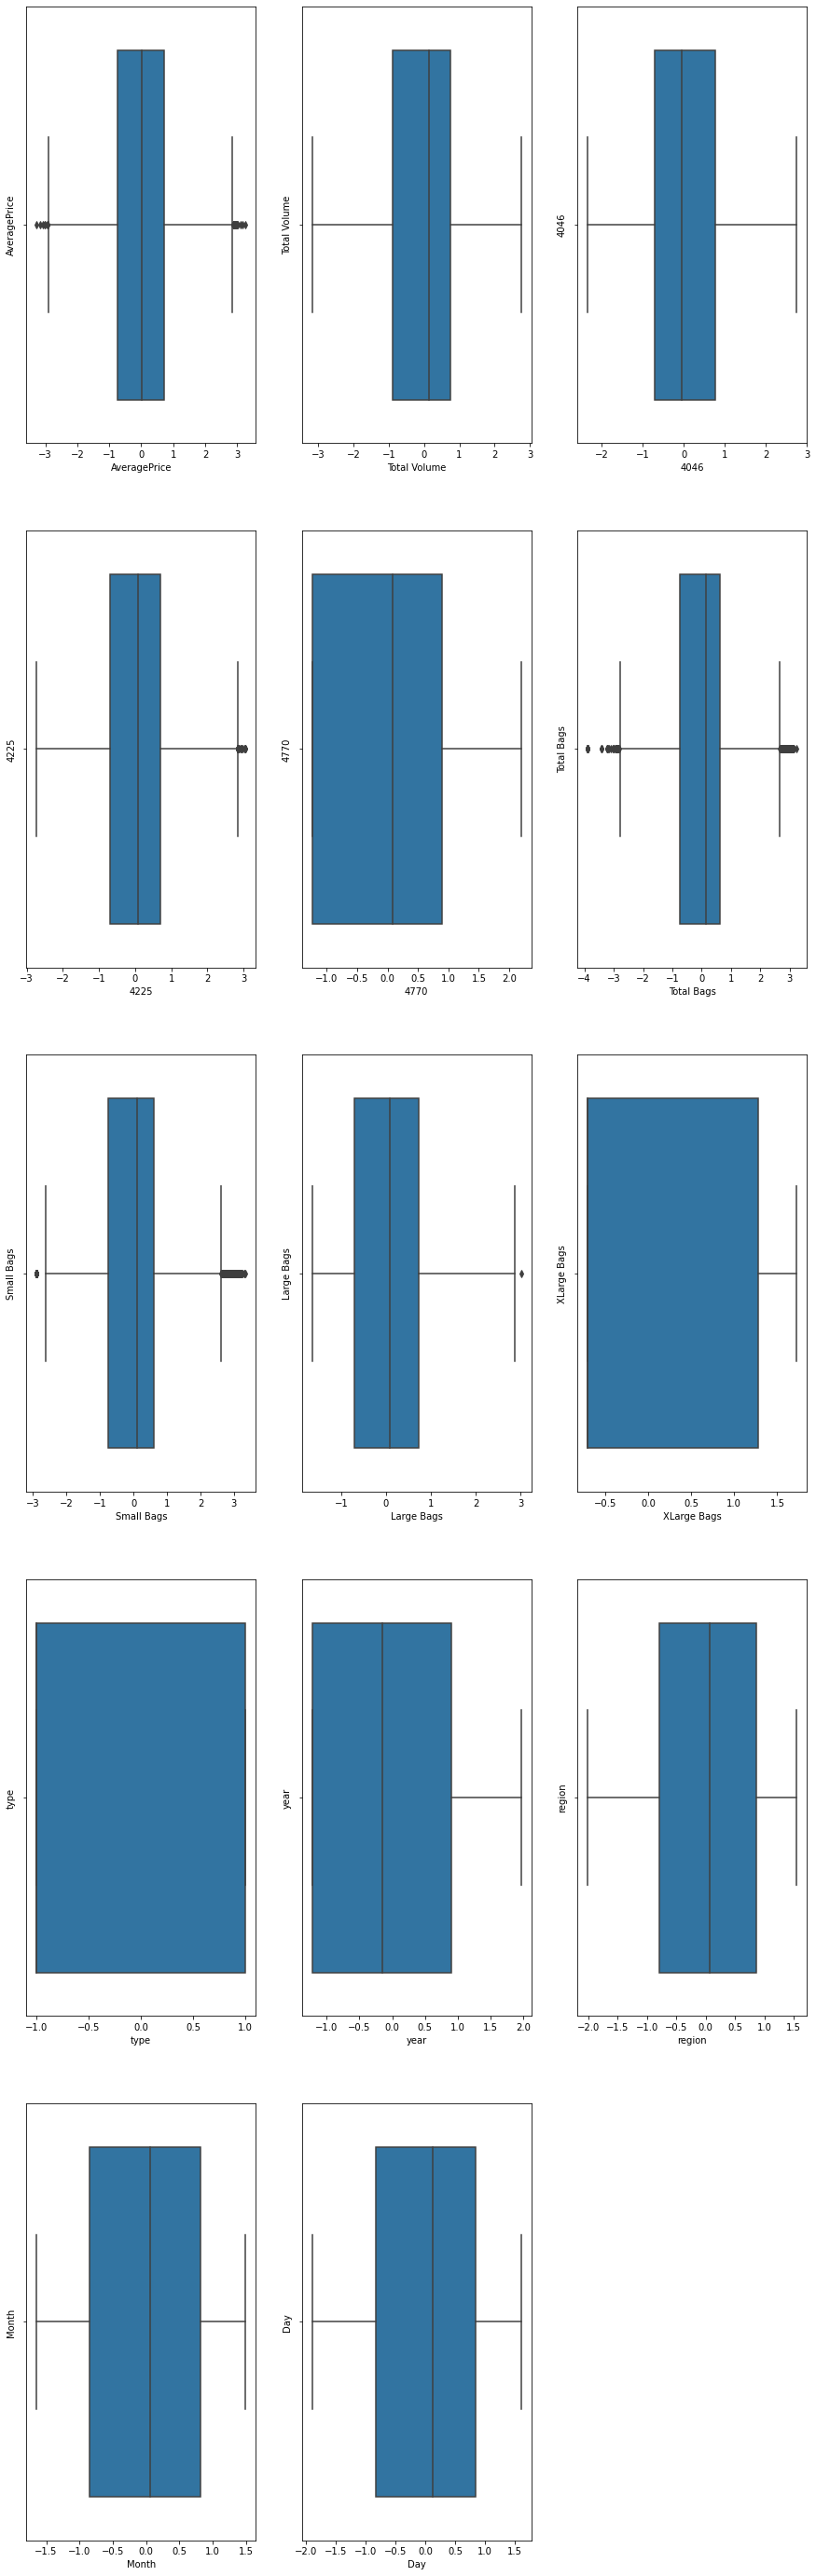

In [147]:
plt.figure(figsize = (15,50))
graphs = 1

for column in ac:
    if graphs <=15:
        ax = plt.subplot(5,3,graphs)
        sns.boxplot(ac[column], orient ='v')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graphs+=1   
plt.show()

We can see that some of our columns have outliers removing the outliers with Z-score technique

In [148]:
ac.shape

(18249, 14)

In [149]:
ac.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [150]:
# Importing z-score
from scipy.stats import zscore

In [151]:
z_score = zscore(ac[['AveragePrice','Total Bags',]])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

ac= ac[filtering_entry]

C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\an

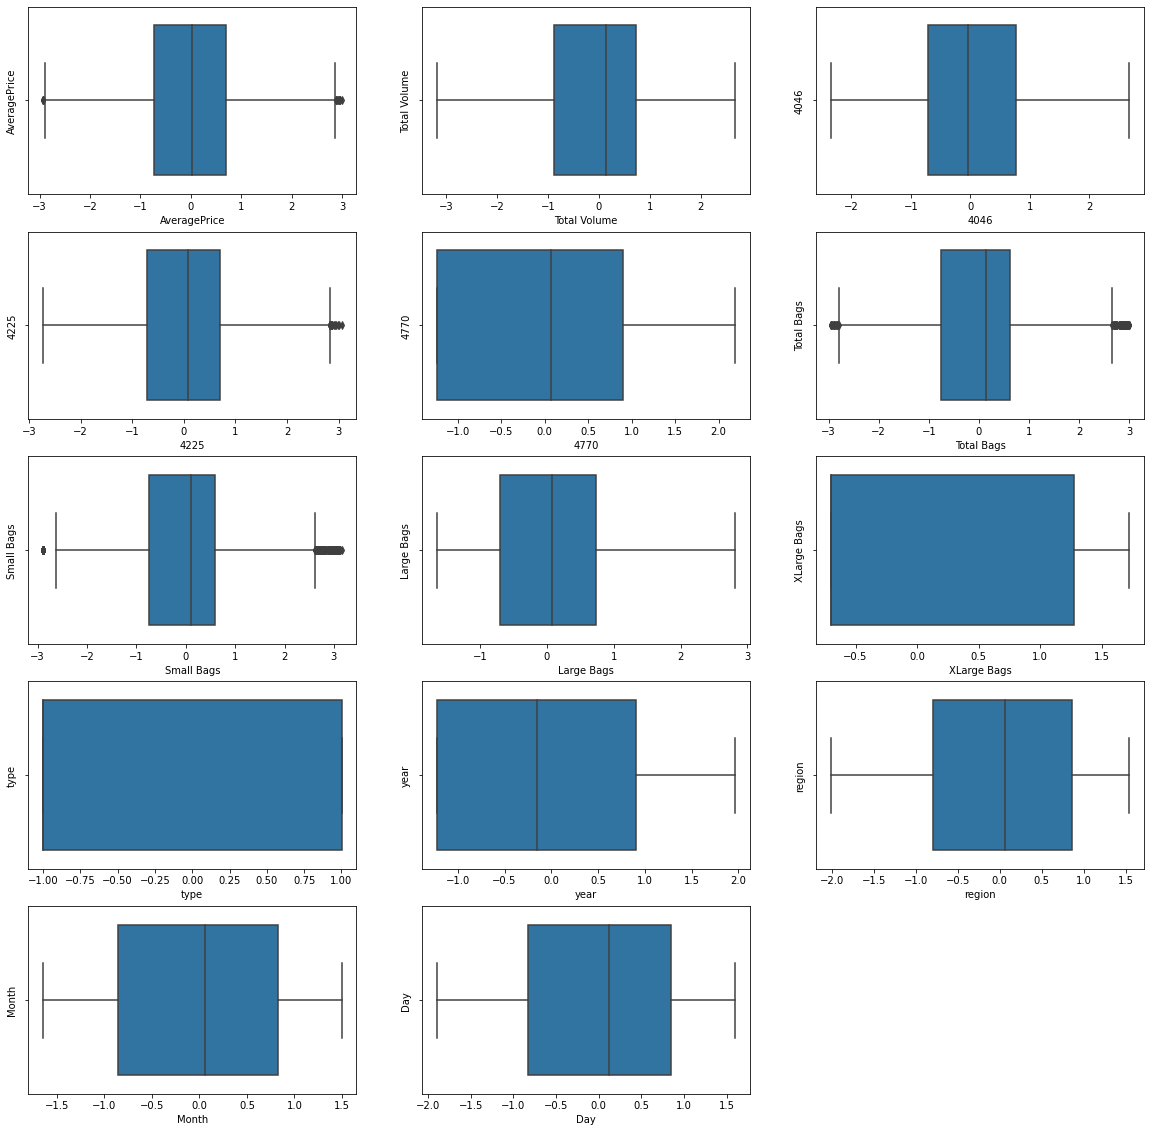

In [152]:
plt.figure(figsize = (20,20))
graphs = 1

for column in ac:
    if graphs <=15:
        ax = plt.subplot(5,3,graphs)
        sns.boxplot(ac[column], orient ='v')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graphs+=1   
plt.show()

Therea are only few outliers now, not to lose data,not making any changes 

In [153]:
ac.shape

(18189, 14)

In [154]:
# Checking data lost

print ('Data lost % is= ', ((18249-18189)/18249)*100 , '%')

Data lost % is=  0.32878513891172123 %


### Going for first part - Taking Avg price as Target and building Regression model¶

In [155]:
x = ac.drop('AveragePrice', axis = 1 )
y = ac['AveragePrice']

In [156]:
# Scaling data with Standard Scalaer
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [158]:
x_scaled

array([[-0.08549265, -0.65820783,  0.31060215, ..., -2.01002507,
         1.49269275,  1.22971549],
       [-0.15486587, -0.77678108,  0.23468696, ..., -2.01002507,
         1.49269275,  0.54136901],
       [ 0.18133456, -0.73173553,  0.58369061, ..., -2.01002507,
         1.49269275, -0.21527848],
       ...,
       [-0.77269873, -0.61931421, -0.7727697 , ...,  1.54801022,
        -1.64225369,  0.64321542],
       [-0.69902335, -0.5495752 , -0.71061226, ...,  1.54801022,
        -1.64225369, -0.10165701],
       [-0.66464015, -0.36670376, -0.7854884 , ...,  1.54801022,
        -1.64225369, -0.95463382]])

In [159]:
x = x_scaled

In [160]:
x

array([[-0.08549265, -0.65820783,  0.31060215, ..., -2.01002507,
         1.49269275,  1.22971549],
       [-0.15486587, -0.77678108,  0.23468696, ..., -2.01002507,
         1.49269275,  0.54136901],
       [ 0.18133456, -0.73173553,  0.58369061, ..., -2.01002507,
         1.49269275, -0.21527848],
       ...,
       [-0.77269873, -0.61931421, -0.7727697 , ...,  1.54801022,
        -1.64225369,  0.64321542],
       [-0.69902335, -0.5495752 , -0.71061226, ...,  1.54801022,
        -1.64225369, -0.10165701],
       [-0.66464015, -0.36670376, -0.7854884 , ...,  1.54801022,
        -1.64225369, -0.95463382]])

In [161]:
# Importing Linear Regression model for getting best random state 
from sklearn.linear_model import LinearRegression


In [162]:
# Dividing data into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [163]:

maxr2 = 0
maxRS=0

for i in range(0,350):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    r2_sc = r2_score(y_test, predf)
    
    if r2_sc>maxr2:
        maxr2=r2_sc
        macRS = i
print('Best R2score is=',maxr2, "Random state=",macRS) 

Best R2score is= 0.5944040124264782 Random state= 233


In [164]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=233)

In [165]:
# Going for Linear Regression model
LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression()

In [166]:
predf=LR.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc


0.5944040124264782

In [167]:
# Checking with KNN model
from sklearn.neighbors import KNeighborsRegressor

In [168]:
KN = KNeighborsRegressor()
KN.fit(x_train,y_train)

preac=KN.predict(x_test)
r2_sc = r2_score(y_test, preac)
r2_sc

0.8224112732649592

In [169]:
# Checking for DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DT =  DecisionTreeRegressor()

DT.fit(x_train,y_train)

preac=DT.predict(x_test)
r2_sc = r2_score(y_test, preac)
r2_sc

0.7790338718503853

In [170]:
# Chacking for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
AD =  AdaBoostRegressor()
AD.fit(x_train,y_train)

preac=AD.predict(x_test)
r2_sc = r2_score(y_test, preac)
r2_sc


0.6148549159938087

KNN is Performing better than rest of the models 

Going gor Hyper_parametr_Tunning with Grid_search_CV

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
param_grid = {'algorithm': ['kd_tree', 'brute'], 
              'leaf_size' : [10,11,14,15,18,20,25],
              'n_neighbors': [3,5,7,9,11,13],
             }

In [173]:
gridsearch = GridSearchCV(estimator=KN, param_grid=param_grid)

In [174]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [175]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5}

In [176]:
KNN = KNeighborsRegressor(algorithm = 'kd_tree', leaf_size=10 , n_neighbors=5)

In [177]:
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

r2_sc = r2_score(y_test, y_pred)
r2_sc

0.8224112732649592

In [178]:
print('Mean Absolute Error is', mean_absolute_error(y_test,y_pred))
print('Mean Squered Error is', mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error is', np.sqrt(mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is 0.3204534384659514
Mean Squered Error is 0.18445445056013732
Root Mean Absolute Error is 0.5660860698391645


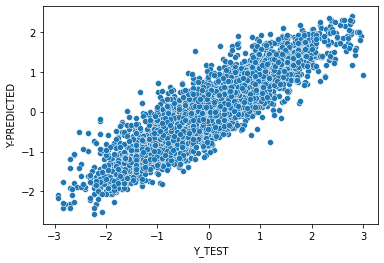

In [179]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Y_TEST')
plt.ylabel('Y-PREDICTED')
plt.show()

In [180]:
# Saving model
import joblib


joblib.dump(KNN,"Avacado_reg")

['Avacado_reg']

### Second part - Taking Region as Target and building Classification model

In [181]:
x_new = ac.drop('region', axis = 1)
y_new = ac['region']

In [182]:
x_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,1.494347,1.229285
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,1.494347,0.541005
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,1.494347,-0.215570
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,1.494347,-1.091311
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,1.278438,1.416727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,-1.220706,-1.382073
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,-1.642047,1.323455
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,-1.642047,0.642842
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,-1.642047,-0.101959


In [183]:
y_new

0       -2.011552
1       -2.011552
2       -2.011552
3       -2.011552
4       -2.011552
           ...   
18244    1.543838
18245    1.543838
18246    1.543838
18247    1.543838
18248    1.543838
Name: region, Length: 18189, dtype: float64

In [184]:
y_new=le.fit_transform(y_new)

In [185]:
y_new

array([ 0,  0,  0, ..., 53, 53, 53], dtype=int64)

In [186]:
# Importing necessry classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [187]:
scaler = StandardScaler()

scaler.fit_transform

<bound method TransformerMixin.fit_transform of StandardScaler()>

In [188]:
maxAcc = 0
maxRS=0

for i in range(0,350):
    x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new,y_new,test_size=0.20, random_state=i)
    KNN = KNeighborsClassifier()
    KNN.fit(x_new_train,y_new_train)
    predf=KNN.predict(x_new_test)
    acc=accuracy_score(y_new_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    

Best Accuracy= 0.6715228147333699 Random state= 179


In [189]:
x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new,y_new,test_size=0.20, random_state=179)

In [190]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_new_train,y_new_train)

predict_=LR.predict(x_new_test)

print("Accuracy is",accuracy_score(y_new_test,predict_)*100)

print(confusion_matrix(y_new_test,predict_))
print(classification_report(y_new_test,predict_))

Accuracy is 55.38757559098406
[[46  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 45 ...  0  0  4]
 ...
 [ 0  0  0 ... 59  2  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  1 ...  0  0 12]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67        67
           1       0.25      0.39      0.31        70
           2       0.83      0.66      0.74        68
           3       0.58      0.47      0.52        60
           4       0.57      0.60      0.59        60
           5       0.67      0.59      0.63        73
           6       0.84      0.88      0.86        78
           7       0.65      0.59      0.62        71
           8       0.68      0.79      0.73        61
           9       0.64      0.80      0.71        70
          10       0.44      0.37      0.40        67
          11       0.62      0.76      0.68        74
          12       0.51      0.42      0.46        73
          13       0.30      0.22      0.25        59
   

C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
# Checking with Random forest Classisfier
rf = RandomForestClassifier()

rf.fit(x_new_train,y_new_train)
pred = rf.predict(x_new_test)

print('Accuracy is',accuracy_score(y_new_test,pred)*100)
print(confusion_matrix(y_new_test,pred))
print(classification_report(y_new_test,pred))

Accuracy is 90.8191313908741
[[63  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  0 ...  0  0 47]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.88      0.81      0.84        70
           2       0.96      1.00      0.98        68
           3       0.92      0.80      0.86        60
           4       0.95      1.00      0.98        60
           5       0.90      0.78      0.84        73
           6       0.97      0.99      0.98        78
           7       0.96      0.92      0.94        71
           8       0.97      0.97      0.97        61
           9       0.94      0.93      0.94        70
          10       0.83      0.93      0.87        67
          11       0.90      0.97      0.94        74
          12       0.96      0.95      0.95        73
          13       0.83      0.92      0.87        59
    

In [192]:
# Support Vector Classifier
svc=SVC()

In [193]:
svc.fit(x_new_train,y_new_train)
new_pred = svc.predict(x_new_test)

print('Accuracy is',accuracy_score(y_new_test,new_pred)*100)
print(confusion_matrix(y_new_test,new_pred))
print(classification_report(y_new_test,new_pred))

Accuracy is 80.04398020890599
[[62  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  1 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.79        67
           1       0.57      0.63      0.60        70
           2       0.96      0.97      0.96        68
           3       0.88      0.73      0.80        60
           4       0.94      0.85      0.89        60
           5       0.89      0.67      0.77        73
           6       0.99      0.97      0.98        78
           7       0.87      0.73      0.79        71
           8       0.95      0.95      0.95        61
           9       0.76      0.74      0.75        70
          10       0.56      0.76      0.65        67
          11       0.83      0.91      0.86        74
          12       0.86      0.96      0.91        73
          13       0.53      0.64      0.58        59
   

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
scr = cross_val_score(LR, x_new,y_new, cv=8)
print("Cross-validation score for Logistic Regression is", scr.mean())


scr = cross_val_score(rf, x_new,y_new, cv=8)
print("Cross-validation score for Random Forest is", scr.mean())


scr = cross_val_score(svc,x_new,y_new, cv=8)
print("Cross-validation score for SVC is", scr.mean())


C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross-validation score for Logistic Regression is 0.4496709295500195
Cross-validation score for Random Forest is 0.7639686381873401
Cross-validation score for SVC is 0.6724861244443103


Though it shows that logisctic regression is best performing model it does not have more parameters to tune also there is very less diffrance between support vector and LR model so going for tunning parameters for Support Vector

In [196]:
from sklearn.model_selection import GridSearchCV


In [197]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [198]:
grids = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [199]:
grids.fit(x_new_train,y_new_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.121 total time=  23.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.102 total time=  23.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=  23.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.124 total time=  23.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.121 total time=  23.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.423 total time=  18.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.443 total time=  18.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.445 total time=  18.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.426 total time=  18.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.439 total time=  18.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.054 total time=  21.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [200]:
print(grids.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [201]:
print(grids.best_estimator_)

SVC(C=100, gamma=0.1)


In [202]:
grid_predictions = grids.predict(x_new_test)

In [203]:
print('Accuracy is',accuracy_score(y_new_test,grid_predictions)*100)
print(confusion_matrix(y_new_test,grid_predictions))
print(classification_report(y_new_test,grid_predictions))

Accuracy is 91.58878504672897
[[65  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  1]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  0 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        67
           1       0.80      0.86      0.83        70
           2       0.99      0.99      0.99        68
           3       0.87      0.88      0.88        60
           4       0.98      1.00      0.99        60
           5       0.91      0.82      0.86        73
           6       1.00      1.00      1.00        78
           7       0.91      0.97      0.94        71
           8       0.97      1.00      0.98        61
           9       0.88      0.90      0.89        70
          10       0.76      0.85      0.80        67
          11       0.95      0.97      0.96        74
          12       0.96      0.99      0.97        73
          13       0.83      0.81      0.82        59
   

In [204]:
# Saving Model

import joblib


joblib.dump(grids.best_estimator_,"Avacado_class")

['Avacado_class']